<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Line%C3%A1ris_transzform%C3%A1ci%C3%B3k_handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bevezető

- Általában magas dimenziós adatokkal dolgozunk.
- Általában több adatunk van, mint dimenziónk. Az adatok azonban nem feltétlenül töltik ki a teljes teret.
- A dimenziószámot csökkenteni kell, így a lényegi információk maradnak meg.
- Kérdés, hogy mit jelent a lényegi információ, hogy tudjuk azt megfogalmazni?

# Nagy dimenzió "átka" I.

<img width="720" src="http://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png" />


http://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/

# Lineáris módszerek

- Ezen az órán lineáris transzformációkkal fogunk dolgozni.
- Lineáris: összeadás, szorzás
- Transzformáció: az összes adatpontot átvisszük egy másik rendszerbe egy koherens leképezéssel

Részletek: https://en.wikipedia.org/wiki/Linear_map

# Mátrixok

- Minden lineáris transzformáció leírható egy mátrix szorzással.

Háttéranyagok:
- https://www.statisticshowto.com/matrices-and-matrix-algebra/
- https://en.wikipedia.org/wiki/Matrix_multiplication

# Lineáris projekció

Dimenzió csökkentési céllal végezhetünk lineáris projekciót.

A fenti példán egy olyan esetet néztünk, ami a már létező tengelyekre vetíti az adatokat.
* Gyakorlatilag eldobunk egy dimenziót
* Azaz: információt veszítünk (nem túl szofisztikált módon)

A reprezentáció tanulás általában dimenziócsökkentést jelent.
* Általában több adat van, mint dimenzió
* (Ellenpélda: genom adatok - más módszereket kell keresni)

Az új reprezentáció az eredeti adatokból képződik
* Lineáris transzformációkkal fogunk kezdeni
* Olyan leképezést keresünk, ami nem feltétlenül a tengelyekre képez.
* Ez azt jelenti, hogy forgatunk is. :)
* A transzformációt mi definiáljuk, keressük meg.

A transzformáció függ a feladattól
* Ha például osztályozni szeretnénk, olyan transzformációt kell keresni, ami szeparálja a mintát.
* El is tudjuk rontani. Például az ábrán a PCA összemossa az adatokat.

![alt text](https://drive.google.com/uc?export=view&id=1WqZDTDxGSYFVps-qcgfNjIArh0J-Pojm)


# PCA

PCA = Principal component analysis

A PCA lineáris transzformáció

A reprezentáció kialakítása
* Az első dimenzió az az irány, ahol a legnagyobb a minta szórása
* A második dimenzió merőleges az első dimenzióra, ezen feltétel mellett a legnagyobb a minta szórása
... és így tovább

Szerencsére van explicit formula
* Azaz a megoldás nem iteratív
* Az új bázis bázisvektorai: kovariancia mátrix sajátvektorai.

![alt text](https://drive.google.com/uc?export=view&id=1_ahHM8593gDKbfR_IkHCgMpUWh1w5pr6)

Ha valakit kicsit mélyebben érdekel: https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

## Iris dataset

In [65]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [66]:
import pandas as pd
import numpy as np

df=pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### --> Feladat 2: Számoljuk ki az Iris dataset PCA bázisát

Segítség
* Mean centering (from numpy import mean)
* Dekompozíció kiszámítása (from sklearn.decomposition import PCA)

In [67]:
# Segítség a centráláshoz: print_stats metódus
from numpy import mean
from scipy.stats import describe
from sklearn.decomposition import PCA
def print_stats(df):
    d = describe(df)
    print('Observations: {}'.format(d.nobs))
    print('Min: {}'.format(d.minmax[0]))
    print('Max: {}'.format(d.minmax[1]))
    print('Mean: {}'.format(d.mean))
    print('Var : {}'.format(d.variance))
    print('Skew: {}'.format(d.skewness))
    print('Kurt: {}'.format(d.kurtosis))
print_stats(df)

Observations: 150
Min: [4.3 2.  1.  0.1 0. ]
Max: [7.9 4.4 6.9 2.5 2. ]
Mean: [5.84333333 3.05733333 3.758      1.19933333 1.        ]
Var : [0.68569351 0.18997942 3.11627785 0.58100626 0.67114094]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421  0.        ]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741 -1.5       ]


In [68]:
# Emeljük ki a feature-öket egy df_feature DataFrame-be!
print(df.columns[0:4])
#df_feature=df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
df_feature=df[df.columns[0:4]]
# Írassuk ki az első néhány sort a DataFrame.head metódus segítségével!
df_feature.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
# Írassuk ki a df_features statisztikáját a print_stats függvény segítségével!
print_stats(df_feature)

Observations: 150
Min: [4.3 2.  1.  0.1]
Max: [7.9 4.4 6.9 2.5]
Mean: [5.84333333 3.05733333 3.758      1.19933333]
Var : [0.68569351 0.18997942 3.11627785 0.58100626]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741]


### Mean centering

Az adatokat centrálni kell.

<img width="720" src="https://i.stack.imgur.com/9vENg.jpg" />

Forrás: https://stats.stackexchange.com/questions/22329/how-does-centering-the-data-get-rid-of-the-intercept-in-regression-and-pca


In [70]:
# Mean centering
# A numpy csomagból importáljuk be a mean metódust!
from numpy import mean
# Számoljuk ki a mean metódus segítségével a változók átlagát egy M dataframebe!
# Segítség: https://scikit-learn.org/stable/modules/preprocessing.html
m=mean(df_feature)
# Írassuk ki M-et!
type(m)
print(m)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


In [71]:
# Centráljuk az eredeti adatokat (kivonás) a dfc nevű dataframe-be!
dfc=df_feature-[m[0],m[1],m[2],m[3]]
# Írassuk ki a dfc statisztikáját
print_stats(dfc)

Observations: 150
Min: [-1.54333333 -1.05733333 -2.758      -1.09933333]
Max: [2.05666667 1.34266667 3.142      1.30066667]
Mean: [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
Var : [0.68569351 0.18997942 3.11627785 0.58100626]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741]


Observations: 150
Min: [-1.54333333 -1.05733333 -2.758      -1.09933333]
Max: [2.05666667 1.34266667 3.142      1.30066667]
Mean: [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
Var : [0.68569351 0.18997942 3.11627785 0.58100626]
Skew: [ 0.31175306  0.31576711 -0.27212767 -0.10193421]
Kurt: [-0.57356795  0.18097632 -1.39553589 -1.33606741]

In [76]:
# Az sklearn.decomposition csomagból importáljuk be a PCA osztályt!
from sklearn.decomposition import PCA
# Hozzuk létre a dfc PCA modelljét egy tr_pca változóba!
# Dokumentáció: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
tr_pca=PCA(dfc)
# Írassuk ki a modellt!
tr_pca

PCA(copy=True, iterated_power='auto',
    n_components=     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642          1.100667
149           0.056667         -0.057333              1.342          0.600667

[150 row

PCA(copy=True, iterated_power='auto',
    n_components=     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.743333          0.442667             -2.358         -0.999333
1            -0.943333         -0.057333             -2.358         -0.999333
2            -1.143333          0.142667             -2.458         -0.999333
3            -1.243333          0.042667             -2.258         -0.999333
4            -0.843333          0.542667             -2.358         -0.999333
..                 ...               ...                ...               ...
145           0.856667         -0.057333              1.442          1.100667
146           0.456667         -0.557333              1.242          0.700667
147           0.656667         -0.057333              1.442          0.800667
148           0.356667          0.342667              1.642          1.100667
149           0.056667         -0.057333              1.342          0.600667

[150 rows x 4 columns],
    random_state=None, svd_solver='auto', tol=0.0, whiten=False)

### --> Feladat 2 vége

### Dimenzió csökkentés

A PCA egyik leggyakoribb alkalmazása a vizualizáció.

Segítségével megnézhetjük az adatokat a két, legnagyobb varianciájú tengely mentén.

### --> Feladat 3: Képezzük át az adatokat a PCA térbe, majd rajzoljuk ki az első két dimenzió szerint.

Segítség
* Transzofrmálás - PCA.fit_transform
* Scatter plot - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

In [110]:
# Hozzuk létre 2 dimenziós PCA modellt (n_components) egy tr_pca2 változóba!
tr_pca2=PCA(n_components=2)
# Tanítsuk be modellt a df_features adatokon, a transzformált adatokat helyezzük a df_pca2 változóba!
df_pca2=tr_pca2.fit_transform(df_feature)
# Írassuk ki a df_pca2 méretét a DataFrame.shape segítségével!
out=pd.DataFrame(data=df_pca2,columns = ['C1', 'C2'])
print(out)

           C1        C2
0   -2.684126  0.319397
1   -2.714142 -0.177001
2   -2.888991 -0.144949
3   -2.745343 -0.318299
4   -2.728717  0.326755
..        ...       ...
145  1.944110  0.187532
146  1.527167 -0.375317
147  1.764346  0.078859
148  1.900942  0.116628
149  1.390189 -0.282661

[150 rows x 2 columns]


In [99]:
# Az iris target mezőjét helyezzük az y nevű változóba!
y=iris["target"]
# Írassuk ki y-t!
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


0     -2.684126
1     -2.714142
2     -2.888991
3     -2.745343
4     -2.728717
         ...   
145    1.944110
146    1.527167
147    1.764346
148    1.900942
149    1.390189
Name: C1, Length: 150, dtype: float64


Ellipsis

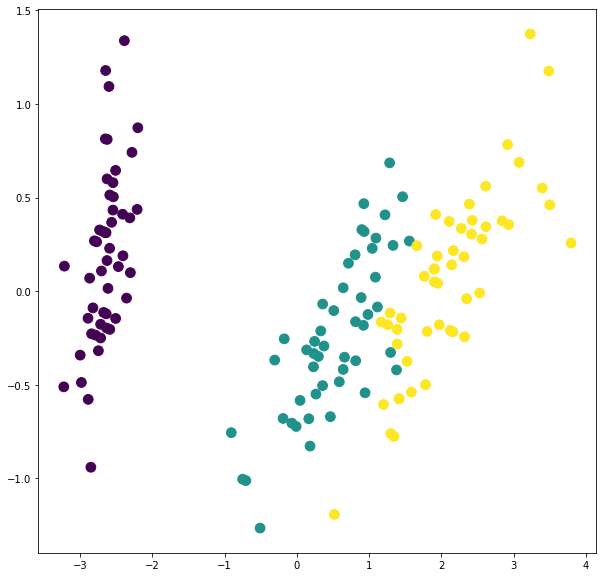

In [122]:
# Importáljuk be a pyplotot a matplotlib-ből plt néven!
from matplotlib import pyplot as plt
# Kezdjünk új ábrát a plt.figure segítségével!
plt.figure(figsize=(10,10))
# Készítsünk egy scatter plotot az a df_pca2 első és második dimenziójából,
# ahol az adatok színét (c) az y adja meg.
print(out["C1"])
plt.scatter(out["C1"],out["C2"],s=95,c=y,)
# A horizontális címke legyen 'PCA 1' (plt.xlabel).
plt.xlabel="asfa"
# A vertikális címke legyen 'PCA 2' (plt.ylabel).
...
# Az ábra címe legyen 'Az Írisz dataset PCA projekciója'.
...
# Jelenítsük meg az ábrát a plt.show segítségével!
...

### --> Feladat 3 vége

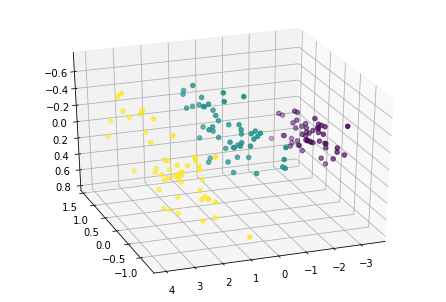

In [123]:
# PCA 3 dimenzióban

from mpl_toolkits.mplot3d.axes3d import Axes3D

tr_pca3 = PCA(n_components=3)
df_pca3 = tr_pca3.fit_transform(df)

fig = plt.figure()
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df_pca3[:, 0], df_pca3[:, 1], df_pca3[:, 2], c=y)

plt.show()

In [ ]:
# 3D és 2D projekció összehasonlítása

tr_pca2 = PCA(n_components=2)
df_pca2 = tr_pca2.fit_transform(df)
df_pca2_recon = tr_pca2.inverse_transform(df_pca2)

tr_pca3 = PCA(n_components=3)
df_pca3 = tr_pca3.fit_transform(df)
df_pca3_2 = tr_pca3.fit_transform(df_pca2_recon)

fig = plt.figure(1)
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(df_pca3[:, 0], df_pca3[:, 1], df_pca3[:, 2], c=y)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_xlim()
zmin, zmax = ax.get_xlim()

fig = plt.figure(2)
ax = Axes3D(fig, elev=-150, azim=110)
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(zmin,zmax)
ax.scatter(df_pca3_2[:, 0], df_pca3_2[:, 1], df_pca3_2[:, 2], c=y)

plt.show()

### Csökkenő variancia

A PCA definíciója alapján a dimenziók szerint csökken a variancia.

In [ ]:
tr_pca = PCA()
tr_pca.fit(df)
plt.plot(np.cumsum(tr_pca.explained_variance_ratio_))
plt.xlabel('PCA komponensek száma')
plt.ylabel('Kumulált variancia');
plt.show()

## Veszteséges tömörítés

Encoding: A PCA egy transzformációt definiál az eredeti térből a "PCA" térbe.

Decoding: Az ellentétes irányú transzformáció is elvégezhető, ezt hívjuk rekonstrukciónak / inverz transzformációnak.
* Erre láttunk is példát (PCA.inverse_transform)

A PCA ortogonális irányokat ad meg
* Ez matematikailag azt jelenti, hogy képes reprezentálni az eredeti teret
* Ha az összes PCA dimenziót használom reprezentációra, akkor vissza tudom állítani az eredeti adatokat.

Mit tudok tenni abban az esetben, ha
* Túl sok dimenzióm van
* Azt gondolom, hogy a dimenziók valamilyen szempontból nézve "redundánsak"
* Szeretném kevesebb byte-tal leírni az adataimat

Egy lehetséges tömörítési módszer
* Az adatokat a PCA bázis egy kiválasztott alterében ábrázolom.
* Azaz nem használom a teljes bázist, csak annak egy részhalmazát.
* Praktikus az elsők közül választani, mivel ott van a nagy variancia.

Információt veszítek.
* Hogy definiáljam azt, hogy melyik információ veszhet el?
* Mi az, ami nem annyira fontos a számomra?
* Mi lenne, ha eldobnám az alacsony varianciájú dimenziókat?

## Digits dataset

In [ ]:
# Digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
print(digits.DESCR)

In [ ]:
digits.data.shape

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
    plt.show()
    
df = digits.data
plot_digits(df)

### --> Feladat 4: Az IRIS dataseten tanultak alapján jelenítsuk meg a digit datasetet PCA segítségével, 2 dimenzióban

In [ ]:
...
...
...
...

In [ ]:
# Segítség:
# edgecolor='none',
# alpha=0.5,
# cmap=plt.cm.get_cmap('nipy_spectral', 10)
...
...
...
...
...

Nem szeparál jól, de nem is arra való.

### --> Feladat 4 vége

In [ ]:
tr_pca = PCA().fit(df)
plt.plot(np.cumsum(tr_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

### -> Feladat 5: Tömörítés, zajszűrés a PCA segítségével

Négy különböző encode-decode párost fogunk összehasonlítani:
 - PCA bázis létrehozása, ami a variancia 90%-át reprezentálja
 - 50%-os variancia
 - Zaj hozzáadása az eredeti mintához, majd encode-decode a 90%-ossal
 - Zajos minta encode-decode az 50%-ossal

In [ ]:
# Hozzunk létre egy PCA objektumot, ami a variancia 90%-át tartja meg!
# A változó neve legyen: tr_pca_p90.
# Dokumentáció: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
...
# Tanítsuk be az adatokon a fit metódus segítségével!
...
# Írassuk ki a komponensek számát (n_components_)!
...

In [ ]:
# Analóg módon hozzunk létre egy PCA objektumot, 50%-os varianciával!
# A változó neve legyen tr_pca_p50.
...
# Tanítsuk be az adatokon a fit metódus segítségével!
...
# Írassuk ki a komponensek számát (n_components_)!
...

In [ ]:
# Zaj hozzáadása a mintához
np.random.seed(42)
df_noisy = np.random.normal(df, 4)
plot_digits(df_noisy)

In [ ]:
# Encode, majd decode
# Lássuk, hogy mennyire változott-e a minta, olvashatók-e még a számjegyek?
# Transzformáljuk a eredeti mintát a 90%-os PCA-val! (transform)
...
# Rekonstruáljuk az encode-olt mintát! (inverse_transform)
...
# Írassuk ki a rekonstruált számjegyeket!
...

In [ ]:
# Tegyük ugyanezt, csak a zajos mintával!
...
...
...

In [ ]:
# Nézzük meg, hogy mi történik a mintával egy 50%-os encode-decode esetén!
...
# Rekonstruáljuk az encode-olt mintát! (inverse_transform)
...
# Írassuk ki a rekonstruált számjegyeket!
...

In [ ]:
# Nézzük meg, hogy mi történik a zajos mintával egy 50%-os encode-decode esetén!
...
# Rekonstruáljuk az encode-olt mintát! (inverse_transform)
...
# Írassuk ki a rekonstruált számjegyeket!
...

### --> Feladat 5 vége

# Faktor analízis

A PCA "továbbfejlesztése"
A PCA egyik problémája az, hogy absztrakt, azaz nem interpretálható, bázisokat hoz létre,
* ezért a szociológia, közgazdaságtan nem annyira kedveli.
* A FA azt ígéri, hogy olyan bázisokat hoz létre, amelyekhez valamilyen szemantikát lehet rendelni.

A FA a "bázist" latent factornak (rejtett tényezőnek) hívja. A latent factor fontos kifejezés a reprezentáció tanulásban.

A modell tulajdonságai
* A model: $x-\mu=LF-\epsilon$ - Itt a hibatag bevezetése a fontos, a PCA teljesen vissza tudja állítani a mintát.
* A faktorok és a hiba függetlenek egymástól ($\mathbb{E}(F\epsilon)=\mathbb{E}(L)\mathbb{E}(\epsilon)$)
* A faktorok centráltak ($\mathbb{E}(F)=0$)
* A faktorok nem korrelálnak ($Cov(F)=I$) - Azaz nem merőlegesek, egy másik szemlélet.
* A variancia dimenzióként változhat ($Var(\epsilon_i)=\psi_i$)

![alt text](https://drive.google.com/uc?export=view&id=134DkXI94YuOEm8_sbqi4-BI3QiWrrJA4)

# LDA

Rövidítés: Linear discriminant analysis

PCA - unsupervised, azaz nincs plusz információ a mintáról

LDA - supervised, címkék is vannak a mintáról

A cél, hogy lineárisan minél jobban szeparáljuk az adatokat
* Maximális távolság a projektált osztályok átlagai között
* Minimális variancia a projektált osztályokban

![alt text](https://drive.google.com/uc?export=view&id=141cFMVnoPTvxONe1K5_uQBjXccte2wWo)

## Megfelelő irányú projekció keresése

Irány megtalálása, közben a döntési pont vizsgálata.

![alt text](https://drive.google.com/uc?export=view&id=10Mv2Xe59wXmUK4AoArhG3i95LDE6Gm0I)

## Eltérő eloszlások

A két eloszlás "metszési pontjánál" található a döntési felület.

![alt text](https://drive.google.com/uc?export=view&id=10gC0LWyOfAiUzBfBiM02L3IQx4Tb9aZ7)

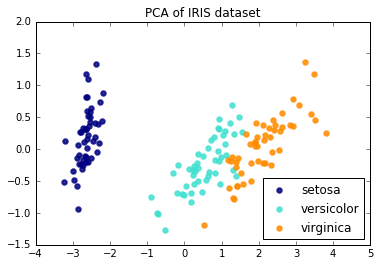

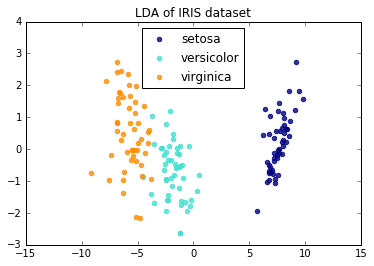

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure(1)
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure(2)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# NMF
Non-negative matrix factorization

Szintén faktorizációs technika.

Matematikai háttér
* $V=WH$, ahol a mátrixok minden eleme pozitív
* A hibafüggvény, amit minimalizálni szeretnénk: $||V-WH||^2_F$
* Iteratív (nem explicit) megoldása van
* Tipikus eljárások: gradient descent, stochastic gradient descent
* Megakadhat lokális minimumban
* A megoldás nem egyedi (több lokális minimum). Lásd: $WH=WBB^{-1}H$

## Lokális optimalizáció

A legtöbb, machine learning területen előforduló eljárás iteratív megoldást ajánl.
* A PCA egy matematikai eszköz.
* A játék itt abból áll, hogy azt, amit el szeretnénk érni, megpróbáljuk matematikai formulákkal megfogalmazni. Például:
 * legyen minden komponens pozitív,
 * legyen minél kisebb a rekonstrukciós hiba
* Matematikusi szemmel nézve a nehézség az, hogy úgy legyen megfogalmazva a probléma, hogy le lehessen vezetni a megoldást.
* A machine learning szakít ezzel.
 * Itt inkább az a fontos, hogy konvergáljon az optimumkeresés.
 * Illetve kis hibát adjon.
 
 Bevezetésként (ezek a módszerek lesznek majd, részletesebben)
 * Gradient descent - Mindig a legmeredekebb irányba megyünk
 * SG - Véletlenszerűen választunk irányt és javítjuk a hibát.
 * Mekkorát lépjünk? Esetleg lépjünk egyre kisebbet? (Simulated annealing)
 * Mikor álljunk meg?
  * Ha már nem meredek?
  * Ha már nincs idő / lépésszám?
  * Ha már elfogyott a lendület? 

![Hibafelület](https://drive.google.com/uc?export=view&id=1Hb0eddRzWskSJYStF46PufJ9rWZ6Ghyl)
forrás: https://www.jeremyjordan.me/gradient-descent/

## NMF ANN háttér

Neurális hálózatok által inspirált módszer

Az NMF egy belső / rejtett reprezentációt alakít ki. (ANN terminológia)

![alt text](https://drive.google.com/uc?export=view&id=1ezIEehYX3Xi7SSKkhUVHgi8ycCX4TZY3)

## NMF vs PCA

Míg a PCA irányokat keres, addig az NMF komponenseket.

![alt text](https://drive.google.com/uc?export=view&id=1NYsh5WczVkdPdnR8HHuQ04kfTf-bj4M9)
![alt text](https://drive.google.com/uc?export=view&id=1MavO2hlyCbaPT-KSlj4og3GmMXIKRy9c)


# Ritka módszerek

* Egy vektor ritka, ha kevés nem nulla értéket tartalmaz.
  * k-sparse - legfeljebb k darab nem nulla értéket tartalmaz
* Reprezentáció tanulás esetén a probléma
  * $V=WH,$
  * $h_i \in H,$ $h_i$ ritka
  * $V$ - az eredeti minta
  * $W$ a koordináták az új reprezentációban
  * $H$ a bázis
* Ez azt jelenti, hogy egy vektor $k$ darab bázis kombinációjaként tudunk előállítani.
  * Ez elviszi a feladatot kombinatorikai irányba - Konkrétan mely dolgok kombinációja legyen a reprezentáció?

In [ ]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Loading dataset...
done in 17.624s.
Extracting tf-idf features for NMF...
done in 0.352s.
Fitting the NMF model with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.345s.

Topics in NMF model:
Topic #0:
just people don think like know time good make way really say right ve want did ll new use years
Topic #1:
windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2:
god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3:
thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4:
car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5:
edu soon com send university internet mit ftp mail cc pub article information hope program mac email home contact blood
Topic #6:
f

* Neurobiológiai motiváció
  * Az emlősök idegrendszere több milliárd neuront tartalmaz
  * Az információ reprezentációja minta (pattern) alapú - ezt neural code-nak hívják
  * A neural code definiálja a reprezentált elemet
  * A sűrű (dense) reprezentációs képessége jóval magasabb, mint amennyi információt reprezentálni szükséges
  * Egyfajta takarékosság, ne kelljen mindig minden idegsejtnek működnie.
  * Több info: http://www.scholarpedia.org/article/Sparse_coding
* Példa:
  * Málna: 1 x piros + 1 x puha
  * Alma: 1 x piros + 1 x kemény
  * Banán: 1 x sárga + 1 x puha
  * Rossz alma: 1 x barna + 1 x puha
* Hol hasznos ez?
  * Ha nem változik körülöttünk a világ, amelyet reprezentálnunk kell, akkor ki tudunk fejleszteni egy optimális reprezentációs eljárást.
  * Tegyük fel, hogy bejön egy új adat, egy új fogalom.
  * Ilyenkor sűrű reprezentáció esetén: bázis újratanulás, majd az összes reprezentáció újraszámítása.
  * Sparse reprezentáció esetén nem kell újratanulni az egész reprezentációt, hanem csak az új dolgot kell megtanulni reprezentálni.
  * Ritka reprezentáció esetén
    * Ha tudunk reprezentálni, akkor csak az új koordinátákat kell kiszámolni.
    * Esetleg hozzá kell tenni egy új latent factort, egyfajta megkülönböztető feature-t. Azaz esetleg lehet új bázisra szükség.
    * Ha valamelyik bázis változik (optimalizáció), akkor csak az érintetteket kell újraszámolni.

## Matematikai megfogalmazás

Két dolgot szeretnénk egyszerre: kis hibát és ritka reprezentációt

Megoldás: a hibatag kiegészítése, például lasso, ridge.

Több info: https://en.wikipedia.org/wiki/Lasso_(statistics)

### Példa 1: Ritka PCA, itt a hibafüggvénybe kerül bele egy új megszorítás.

![alt text](https://drive.google.com/uc?export=view&id=1CIWFcy5O2S7wbpuZ2-ooWcdIHNawWDBV)

Fontos: 1-es norma.

### Példa 2: Ritka NMF, hibafüggvénnyel

![alt text](https://drive.google.com/uc?export=view&id=1KjhpnZ2-GW-RuTOGQZeEXMWoR77PBDsy)

https://en.wikipedia.org/wiki/Norm_(mathematics)

## 1-es norma

![alt text](https://drive.google.com/uc?export=view&id=1OG79nFG1JJATSftXAXrIDOKIE6jy-U1h)

Forrás: https://gerardnico.com/data_mining/lasso


# Restricted Boltzmann Machine

* 1986-ban vezették be
* Restricted - két réteg van: hidden és visible
* Generatív sztochasztikus ANN
   * Hidden units - terminológia
   * Joint probability eloszlást definiál a hidden és a visible units között. (szép mondat :)
   * A stochasztikusság jól jöhet zaj esetén.
* Optimalizáció
   * Egy energiafüggvényt definiál, ami gyakran előfordul ANN területen
   * $E(v,h) = -\sum_i a_i v_i - \sum_j b_j h_j -\sum_i \sum_j v_i w_{i,j} h_j$
  * A megoldás az energiafüggvény optimalizációja alapján áll elő
* Kapcsolat: [Markov random field](https://https://en.wikipedia.org/wiki/Markov_random_field)

![alt text](https://drive.google.com/uc?export=view&id=1VysYOMZT5zyvAygA9v3O2QbHJLiAQq7s)

Kép forrása, illetve több info: https://en.wikipedia.org/wiki/Restricted_Boltzmann_machine

# Hebbian learning

* Unsupervised, azaz címkézetlen adatokon dolgozik.
* Egyfajta asszocitatív memória
* Azokat a kapcsolatokat erősíti, amelyek időben együtt tüzelnek (fire together -> wire together)

https://en.wikipedia.org/wiki/Hebbian_theory

# Encoder - decoder terminológia

* $L(x-g_\Theta(f_\Theta(x)))$
 * $L$ hibafüggvény
 * $f_\Theta$ kódoló (encoder)
 * $g_\Theta$ dekódoló (decoder)
* Lineáris eset:
 * $f_\Theta(x)=b+Wx$
 * $g_\Theta(x)= d + W'h$
* PCA: L = MSE (mean squared error) és W ortogonális
* Példa:
 * de-noising autoencoder - várható értéket a hibafüggvényben
 * contractive autoencoder - [Jacobian](https://https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) a hibafüggvényben
 * Sparse autoencoder - egyes norma a hibatagban

![Deep Learning](https://i1.wp.com/www.michaelchimenti.com/wp-content/uploads/2017/11/Deep-Neural-Network-What-is-Deep-Learning-Edureka.png?ssl=1)
forrás: https://cdn.edureka.co/blog/wp-content/uploads/2017/05/Deep-Neural-Network-What-is-Deep-Learning-Edureka.png

# Alapelvek

* Smooth - $x~y$, implies that $f(x)~f(y)
* Multiple explanatory factors - The data has to be generated by several underlying factors. Not one.
* Disentangling factors - Somehow independent, not necessarily orthogonal.
* Sparsity - Only a few explanatory factors for each observation.
* Hierarchical organization of the explanatory factors - More and less abstract concepts, deep learning.
* Simplicity - In good, high level representations the factors are related to each other through simple (in most cases linear) dependencies.
* Coherence - Spatially nearby observations should be associated with the same value of categorical concepts.
* Manifolds - Different values of categorical variables are associated with separate manifolds.

Forrás: Representation Learning: A Review and New Perspectives by Bengio et al.

Link: https://arxiv.org/abs/1206.5538

# Könyvajánló

Simon O. Haykin - Neural Networks and Learning Machines

http://dai.fmph.uniba.sk/courses/NN/haykin.neural-networks.3ed.2009.pdf